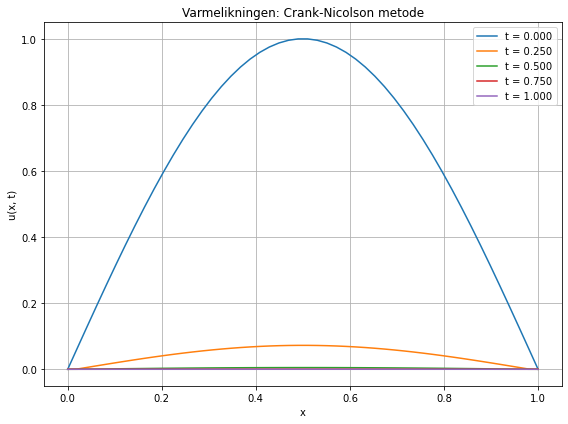

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parametre
L = 1.0
T = 1.0
nx = 50
x = np.linspace(0, L, nx)
h = x[1] - x[0]

alpha = 0.4
k = alpha * h**2
nt = int(T / k)


u = np.sin(np.pi * x) # Initialbetingelse
u[0] = u[-1] = 0  # Randbetingelse

solutions = [u.copy()]

# Lager matriser A og B for Crank-Nicolson
# A * u^{j+1} = B * u^j
n_inner = nx - 2

# A-matrise
diagonal_A = (1 + alpha) * np.ones(n_inner)
off_diagonal_A = -alpha / 2 * np.ones(n_inner - 1)

ab_A = np.zeros((3, n_inner))
ab_A[0, 1:] = off_diagonal_A  # over-diagonal
ab_A[1, :] = diagonal_A      # diagonal
ab_A[2, :-1] = off_diagonal_A  # under-diagonal

# B-matrise
def B_times_u(u):
    u_inner = u[1:-1]
    b = np.zeros_like(u_inner)
    b[1:-1] = (
        (alpha / 2) * u_inner[:-2]
        + (1 - alpha) * u_inner[1:-1]
        + (alpha / 2) * u_inner[2:]
    )
    return b

# Tidssimulering
for _ in range(nt):
    b = B_times_u(u)
    u[1:-1] = solve_banded((1, 1), ab_A, b)
    solutions.append(u.copy())

# Plot utvalgte tidspunkter
plt.figure(figsize=(8, 6))
for frac in [0, 0.25, 0.5, 0.75, 1.0]:
    t_idx = int(frac * (len(solutions) - 1))
    plt.plot(x, solutions[t_idx], label=f't = {t_idx * k:.3f}')

plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Varmelikningen med Crank-Nicolson metode")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()